In [ ]:
### https://blog.devgenius.io/graph-modeling-in-pyspark-using-graphframes-part-1-e7cb42099182


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
!pip install graphframes


In [ ]:
import os
import sys
import glob
from os.path import abspath
os.environ['SPARK_HOME'] = '/content/spark-3.1.2-bin-hadoop3.2'
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ['HADOOP_HOME'] = '/content/spark-3.1.2-bin-hadoop3.2'

spark_python = os.path.join(os.environ.get('SPARK_HOME',None),'python')
py4j = glob.glob(os.path.join(spark_python,'lib','py4j-*.zip'))[0]
graphf = glob.glob(os.path.join(spark_python,'graphframes.zip'))[0]
print(graphf)
sys.path[:0]=[spark_python,py4j]
sys.path[:0]=[spark_python,graphf]

os.environ['PYTHONPATH']=py4j+os.pathsep+graphf
import findspark
findspark.init()
findspark.find()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Spark Examples").enableHiveSupport().getOrCreate()

from graphframes import *
import networkx as nx
import matplotlib.pyplot as plt

/content/spark-3.1.2-bin-hadoop3.2/python/graphframes.zip


In [ ]:
vertices = spark.createDataFrame([
    ("Alice", 45),
    ("Jacob", 43),
    ("Roy", 21),
    ("Ryan", 49),
    ("Emily", 24),
    ("Sheldon", 52)],
    ["id", "age"]
)
edges = spark.createDataFrame([("Sheldon", "Alice", "Sister"),
                              ("Alice", "Jacob", "Husband"),
                              ("Emily", "Jacob", "Father"),
                              ("Ryan", "Alice", "Friend"),
                              ("Alice", "Emily", "Daughter"),
                              ("Alice", "Roy", "Son"),
                              ("Jacob", "Roy", "Son")],
                             ["src", "dst", "relation"])
vertices.show()
edges.show()

+-------+---+
|     id|age|
+-------+---+
|  Alice| 45|
|  Jacob| 43|
|    Roy| 21|
|   Ryan| 49|
|  Emily| 24|
|Sheldon| 52|
+-------+---+

+-------+-----+--------+
|    src|  dst|relation|
+-------+-----+--------+
|Sheldon|Alice|  Sister|
|  Alice|Jacob| Husband|
|  Emily|Jacob|  Father|
|   Ryan|Alice|  Friend|
|  Alice|Emily|Daughter|
|  Alice|  Roy|     Son|
|  Jacob|  Roy|     Son|
+-------+-----+--------+



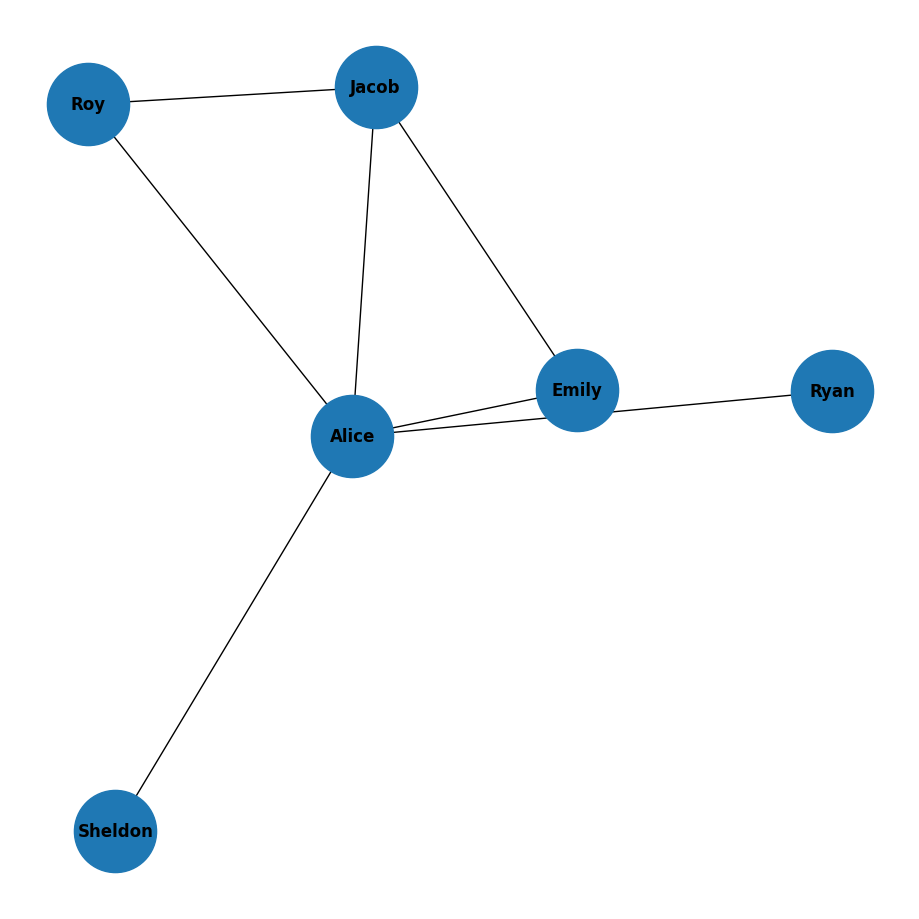

In [ ]:
family_tree = GraphFrame(vertices, edges)

# the function will plot the source and destination nodes and connect them by
#mean of undirected line
def plot_undirected_graph(edge_list):
    # edge list contains infor,ation about edges which have clear direction
    # hoowever we will diregard the the direction in this function
    # the first thing is to plot the figure
    plt.figure(figsize=(9,9))
    # we instantiate a networkx graoh object.
    # nx. graoh represents an undirected graph.
    gplot=nx.Graph()
    for row in edge_list.select("src", "dst").take(1000):
        gplot.add_edge(row["src"], row["dst"])
    nx.draw(gplot, with_labels=True, font_weight="bold", node_size=3500)
plot_undirected_graph(family_tree.edges)

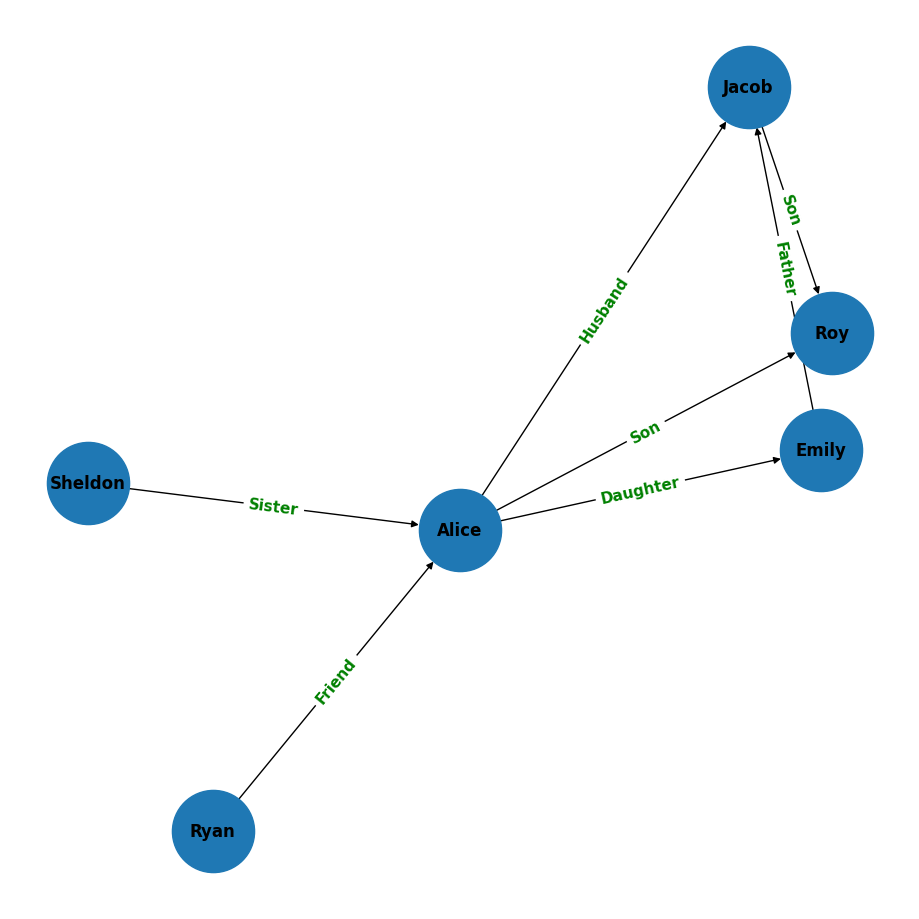

In [ ]:
# the function will plot the source and destination nodes and connect them by mean
# of directed line
def plot_directed_graph(edge_list):
    plt.figure(figsize=(9,9))
    gplot=nx.DiGraph()
    edge_labels = {}
    for row in edge_list.select("src", "dst", "relation").take(1000):
        gplot.add_edge(row["src"], row["dst"])
        edge_labels[(row["src"], row["dst"])] = row["relation"]
    pos = nx.spring_layout(gplot)
    nx.draw(gplot, pos, with_labels=True, font_weight="bold", node_size=3500)
    nx.draw_networkx_edge_labels(gplot, pos, edge_labels=edge_labels, font_color="green",
                                 font_size=11, font_weight="bold")
plot_directed_graph(family_tree.edges)
